In [1]:
import tensorflow as tf
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
__author__ = "Olivares Castillo José Luis"

tf.__version__

'1.5.0-rc0'

In [2]:
es,na = utils.load_node2vec()

In [3]:
na_dummy = na.drop(na.columns[0],axis=1)
na_vectores1 = np.array(na_dummy)

In [4]:
eval_set = pd.read_csv("../lexiconevaluacion/evaluationset",delimiter=" ",names=["esp","nah"])

In [5]:
eval_set.head()

,esp,nah
0,traer,itqui
1,traer,huica
2,traer,huiqui
3,traer,cui
4,adornar,apana


In [6]:
def get_seed_index(lexicon_input, lexicon_target):
    """Esta función obtiene los índices de las palabras semillas de los
    dataframes.
    
    Arguments:
        lexicon_input {Dataframe} -- Contiene vectores n2v de español.
        lexicon_target {Dataframe} -- Contiene vectores n2v de náhuatl.
    
    Returns:
        list (2) -- Listas con índices de las palabras semillas.
    
    TODO:
        Agregar opción para leer set de evaluación o pruebas.
    """
    names = ["esp", "nah"]
    # Se lee el lexicon necesario
    #lexiconsemilla = read_csv("../lexiconessemilla/lexiconsemilla_final.txt", delimiter=" ", names=names)
    lexiconsemilla = pd.read_csv("../lexiconevaluacion/evaluationset", delimiter=" ", names=names)

    #print(lexiconsemilla.shape)
    semillas_esp = list(lexiconsemilla["esp"].values)
    semillas_nah = list(lexiconsemilla["nah"].values)
    print(len(semillas_nah),len(semillas_nah),"semillas")

    pares = list(zip(semillas_esp, semillas_nah))

    # Busca vectores de las semillas, sino existen, lo descarta
    # lexicones en español. 
    not_found = list()
    for i, palabra_es in enumerate(semillas_esp):
        if lexicon_input[lexicon_input[0] == palabra_es].shape[0] == 0:
            not_found.append(i)
    print("es", not_found)
    # Índices de lexicones que no tienen vectores
    not_found = tuple(not_found)
    
    #Muestra las palabras sin vectores
    for i in not_found:
        print(pares[i][0])
    
    pares = [v for i, v in enumerate(pares) if i not in frozenset(not_found)]
    '''
    with open("newlexicona.lst", "w") as fd:
        for _ in pares:
            fd.write(_[0] + " " + _[1] + "\n")
    '''
    ##################
    # Nuevo lexicon 
    semillas_esp, semillas_nah = zip(*pares)
    #print(len(semillas_esp))
    del not_found
    # Busca vectores de las semillas, sino existen, lo descarta
    # lexicones en náhuatl.
    not_found = list()
    for i, palabra_na in enumerate(semillas_nah):
        if lexicon_target[lexicon_target[0] == palabra_na].shape[0] == 0:
            not_found.append(i)
    print("nah", not_found)

    not_found = tuple(not_found)
    # Muestra palabras en náhuatl sin vectores
    for i in not_found:
        print(pares[i][1])
    pares = [v for i, v in enumerate(pares) if i not in frozenset(not_found)]
    # Genera un nuevo lexicon donde todas tienen sus correspondientes
    # representaciones vectoriales 
    """
    with open("newlexiconb.lst", "w") as fd:
        for _ in pares:
            fd.write(_[0] + " " + _[1] + "\n")
    """
    semillas_esp, semillas_nah = zip(*pares)
    #print("asd",type(semillas_esp),len(semillas_nah))

    # Busca el índice del lexicon dentro de los dataframes para acceder a 
    # sus vectores.
    index_esp = [int(lexicon_input[lexicon_input[0] == palabra].index[0])
                 for palabra in semillas_esp]

    index_nah = [int(lexicon_target[lexicon_target[0] == palabra].index[0])
                 for palabra in semillas_nah]
    print(len(index_esp),len(index_nah))
    return index_esp, index_nah,semillas_esp, semillas_nah

eval_seed=get_seed_index(es,na)

295 295 semillas
es []
nah [25, 26, 28, 52, 55, 56, 57, 68, 72, 75, 76, 87, 143, 144, 145, 149, 165, 167, 176, 191, 237, 243, 290]
etic
eti
eamiiiz
chipahua
tocococauh
cococauh
cococa
notelpochtli
iglesia
temictli
temic
motlahtocatlalli
tapazolli
tapazol
pa
muñeca
ichpoca
chol
ronyaa
caqui
tlanteciz
chicha
tozki
272 272


In [7]:
eval_seed[0].__len__(),eval_seed[1].__len__()

(272, 272)

In [8]:
na[na[0]=="tozki"]

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128


In [9]:
eval_es = list(set(eval_set["esp"]))
#eval_es = list(set(eval_seed[2]))

In [10]:
len(eval_es)

150

In [11]:
eval_es_index = [int(es[es[0] == palabra].index[0])
                  for palabra in eval_es]

In [12]:
es[es[0] == "pluma"]

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
2902,pluma,-0.386967000000000005,0.005026,-0.191887000000000002,-0.081058000000000005,-0.211675000000000002,-0.217542999999999986,-0.019026000000000001,0.454046000000000005,0.006309,...,-0.013390000000000001,0.023695999999999998,0.394602000000000008,-0.003221,-0.708667000000000047,0.021819000000000002,0.181774999999999992,0.436242000000000019,-0.162193000000000004,-0.076617000000000005


In [13]:
eval_es_index[0]

199

In [14]:
eval_es_vectores = utils.get_vectors(es,eval_es_index)

In [15]:
eval_es_vectores.shape

(150, 128)

In [16]:
test_vectors = np.array([np.array(es.iloc[indice][1::]).astype(np.float64) for indice in eval_es_index])

In [17]:
sess = tf.Session()

In [18]:
saver = tf.train.import_meta_graph('./models/model1111_gpu/model2250.ckpt.meta')
saver.restore(sess,tf.train.latest_checkpoint('./models/model1111_gpu/'))

INFO:tensorflow:Restoring parameters from ./models/model1111_gpu/model2250.ckpt


In [19]:
graph = tf.get_default_graph()

In [20]:
X = graph.get_tensor_by_name("input/input_es:0")
#y = graph.get_tensor_by_name("input/target_na:0")

In [21]:
[n.name for n in tf.get_default_graph().as_graph_def().node]

['input/input_es',
 'input/target_na',
 'dropout_constant',
 'Const',
 'W1/Initializer/random_uniform/shape',
 'W1/Initializer/random_uniform/min',
 'W1/Initializer/random_uniform/max',
 'W1/Initializer/random_uniform/RandomUniform',
 'W1/Initializer/random_uniform/sub',
 'W1/Initializer/random_uniform/mul',
 'W1/Initializer/random_uniform',
 'W1',
 'W1/IsInitialized/VarIsInitializedOp',
 'W1/Assign',
 'W1/Read/ReadVariableOp',
 'Read/ReadVariableOp',
 'Identity',
 'W1/Regularizer/l2_regularizer/scale',
 'W1/Regularizer/l2_regularizer/L2Loss/ReadVariableOp',
 'W1/Regularizer/l2_regularizer/L2Loss',
 'W1/Regularizer/l2_regularizer',
 'Const_1',
 'b1',
 'b1/Assign',
 'b1/read',
 'xw_plus_b/ReadVariableOp',
 'xw_plus_b/MatMul',
 'xw_plus_b',
 'fc1',
 'transpose/Rank/ReadVariableOp',
 'transpose/Rank',
 'transpose/sub/y',
 'transpose/sub',
 'transpose/Range/start',
 'transpose/Range/delta',
 'transpose/Range',
 'transpose/sub_1',
 'transpose/ReadVariableOp',
 'transpose',
 'Const_2',
 'b2'

In [22]:
#kprob = graph.get_tensor_by_name("Placeholder:0")

In [23]:
#output_NN = graph.get_tensor_by_name("output/xw_plus_b:0")#model1937
output_NN = graph.get_tensor_by_name("xw_plus_b_1:0")
#output_NN = graph.get_tensor_by_name("dense_2/BiasAdd:0")
#output_NN = graph.get_tensor_by_name("output_1:0")

In [24]:
for v in tf.trainable_variables():
        print(v.name)

W1:0
b1:0
b2:0


In [25]:
from tensorflow.python import pywrap_tensorflow
    
model_file = "./models/model1111_gpu/model2250.ckpt"
reader = pywrap_tensorflow.NewCheckpointReader(model_file)
var_to_shape_map = reader.get_variable_to_shape_map()
    
for key in sorted(var_to_shape_map):
    print("tensor_name: ", key)
    #print(reader.get_tensor(key))
print(type(reader.get_tensor("b1")))

tensor_name:  W1
tensor_name:  W1/Adagrad
tensor_name:  b1
tensor_name:  b1/Adagrad
tensor_name:  b2
tensor_name:  b2/Adagrad
<class 'numpy.ndarray'>


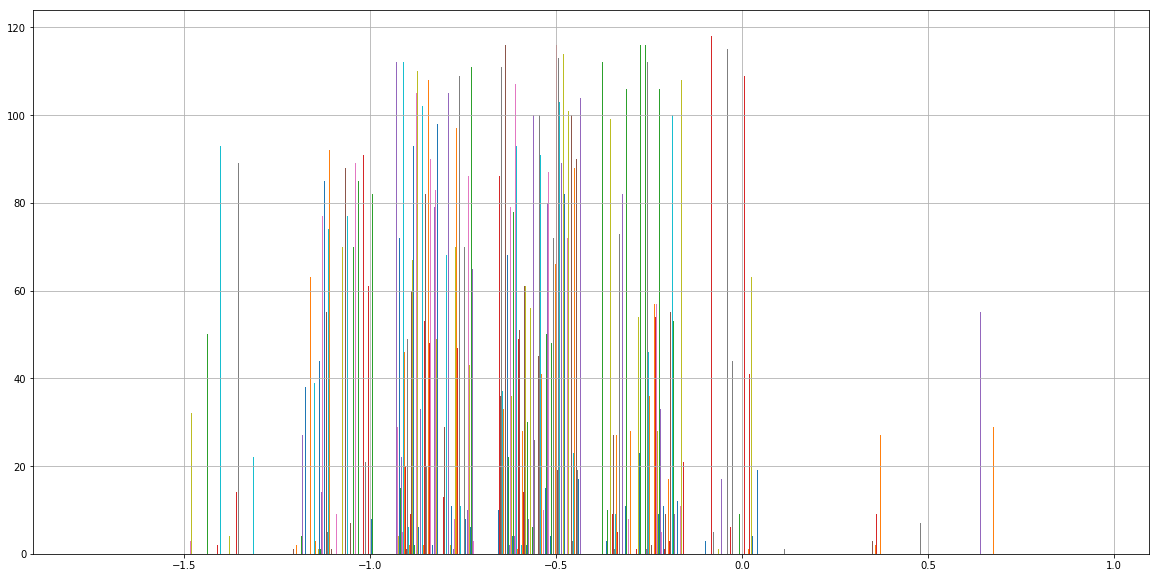

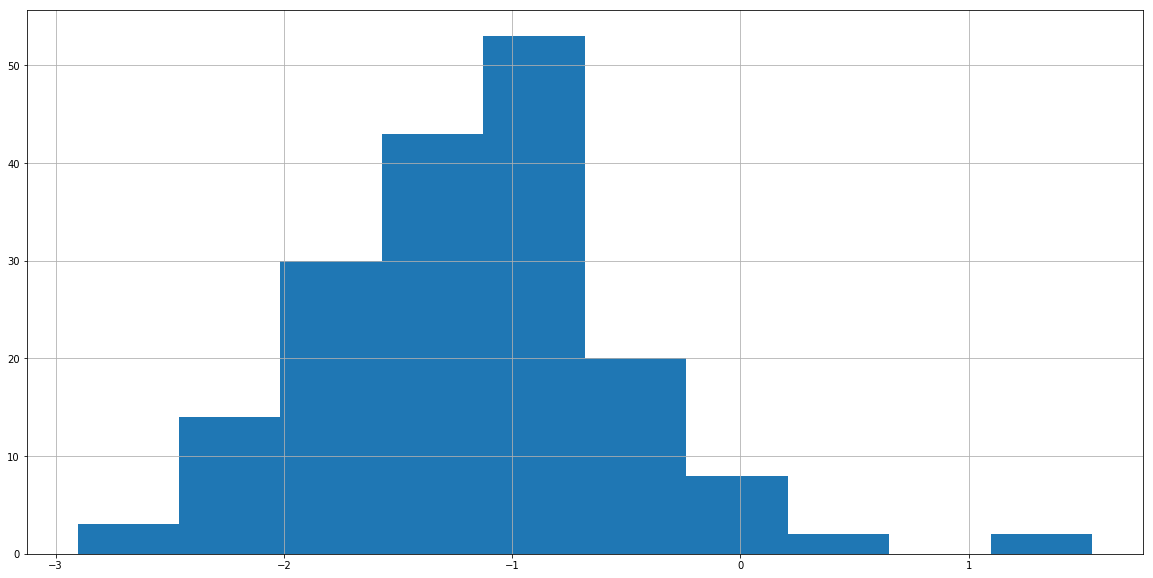

In [26]:
def plot_tensors(tensor):
    plt.figure(figsize=(20,10))
    plt.hist(reader.get_tensor(tensor)+reader.get_tensor("b1"))
    plt.grid(True)
    plt.show()
plot_tensors("W1")
plot_tensors("b1")

In [27]:
feed_dict = {X:test_vectors}
pred = sess.run(output_NN,feed_dict)
print (type(pred[0]),pred.shape)

<class 'numpy.ndarray'> (150, 128)


In [28]:
top_10 = [utils.get_top10_closest(pred[_],na_vectores1) for _ in range(pred.shape[0])]
closest = [utils.get_closest_words_to(top_10[_],na) for _ in range(pred.shape[0])]

In [29]:
es[es[0]=="adquisición"].index

Int64Index([2222], dtype='int64')

In [30]:
na[na[0]=="v"].index

Int64Index([1376], dtype='int64')

In [31]:
eval_es[6]

'salvador'

In [32]:
closest[6]

['salvador',
 'tema',
 'quixti',
 'pr',
 'jesu',
 'cachihualiz',
 'yia',
 'macehui',
 'zcal',
 'risto']

In [33]:
resultados = {palabra_es:top_10_nah for (palabra_es,top_10_nah) in zip(eval_es,closest)}

In [34]:
esp = list(eval_set["esp"].values)
nah = list(eval_set["nah"].values)
pares_eval = list(zip(esp,nah))

In [35]:
from collections import defaultdict
gold = defaultdict(list)
for palabra_es,palabra_na in pares_eval:
    gold[palabra_es].append(palabra_na)
gold = dict(gold)

In [36]:
gold["amado"]

['tlazo', 'tlazohtla']

In [37]:
resultados["amado"]

['tlazohtla',
 'ticcua',
 'ama',
 'zquia',
 'tlazo',
 'diego',
 'comal',
 'secretario',
 'federal',
 'dral']

In [38]:
p1 = 0
p5 = 0
p10 = 0
list_esp_eval = (list(resultados.keys()))
hits=list()

not_found = list()

for palabra_gold in list_esp_eval:
    for i in gold[palabra_gold]:
        if i in resultados[palabra_gold]:
            hits.append(resultados[palabra_gold].index(i))
    if hits.__len__() > 0:
        if min(hits) == 0:
            p1 += 1
            p5 += 1
            p10 += 1
        if min(hits) >= 1 and min(hits) <= 5:
            p5 += 1
            p10 += 1
        if min(hits) > 5 and min(hits) <= 10:
            p10 += 1
        print(palabra_gold,min(hits),hits,p1,p5,p10)
    else:
        not_found.append(palabra_gold)
        print(palabra_gold+": NOT FOUND")
   
    hits.clear()

length=list_esp_eval.__len__()
print("\nnot found:", not_found.__len__(), "\nP@1:", p1 / length,
      "\tP@5:", p5 / length, "\tP@10:", p10 / length)
     


amado 0 [4, 0] 1 1 1
introducir 0 [1, 0] 2 2 2
gritar 0 [0, 2] 3 3 3
limpiar 0 [1, 0, 4] 4 4 4
niño 1 [1, 2, 4, 3] 4 5 5
presidente 0 [0] 5 6 6
salvador 0 [0, 1, 2] 6 7 7
adornar 1 [2, 1] 6 8 8
tepaneca 1 [1] 6 9 9
ramo 0 [0] 7 10 10
tanto 1 [1] 7 11 11
ver 0 [1, 6, 0] 8 12 12
nido: NOT FOUND
despreciar 9 [9] 8 12 13
pluma 0 [0] 9 13 14
pedir 0 [3, 4, 0, 8] 10 14 15
salvaje 0 [0] 11 15 16
desierto 2 [2] 11 16 17
aire 0 [0, 5, 1, 1] 12 17 18
tráiganla 2 [2] 12 18 19
visceras: NOT FOUND
galleta 0 [0] 13 19 20
ocurrir 2 [2, 8] 13 20 21
pídele 0 [0] 14 21 22
llanura 0 [0] 15 22 23
pantalón 0 [0] 16 23 24
yo 1 [1, 6] 16 24 25
volver 0 [0, 1] 17 25 26
alfredo 0 [0] 18 26 27
conocer 0 [0, 6, 2, 5] 19 27 28
derecho 1 [1, 3] 19 28 29
efecto: NOT FOUND
prestar 0 [0] 20 29 30
escalera: NOT FOUND
mixcólotl 1 [1] 20 30 31
quiltoniles 7 [7] 20 30 32
coger 0 [0] 21 31 33
vasija 0 [1, 3, 0] 22 32 34
nombre 0 [0] 23 33 35
animal 0 [0, 7] 24 34 36
cofre 0 [0, 1] 25 35 37
desear 0 [0, 1, 3] 26 36 38
paso

In [39]:
len(list(resultados.keys())),not_found.__len__(),not_found.__len__()/len(list(resultados.keys()))

(150, 15, 0.1)

In [40]:
resultados_gold = dict()
for k,v in resultados.items():
    resultados_gold[k] = {"GOLD":gold[k],"RESULTS":v}

# Palabras no encontradas

In [41]:
for res in not_found:
    print(res+":",resultados_gold[res],end="\n"*2)

nido: {'GOLD': ['tapazolli', 'tapazol', 'pa', 'zol'], 'RESULTS': ['nepapan', 'motemilih', 'mota', 'huipan', 'tenanco', 'diego', 'tlazo', 'dral', 'secretario', 'rosario']}

visceras: {'GOLD': ['ihti', 'ehua'], 'RESULTS': ['cuacualaca', 'tlahuicxitilli', 'motlali', 'tlalia', 'itzoltilia', 'temolcax', 'zoqui', 'cuacua', 'caxi', 'huic']}

efecto: {'GOLD': ['nel'], 'RESULTS': ['tlaocox', 'ihtotia', 'oquich', 'nehnemi', 'mixco', 'oceloquichtle', 'tz', 'timamalihuac', 'iuhquin', 'icnihuan']}

escalera: {'GOLD': ['mama'], 'RESULTS': ['nmediasco', 'oquinanquili', 'ilpia', 'dia', 'cocone', 'icuilacta', 'nonotza', 'comal', 'educaci', 'pualhuany']}

chiquillo: {'GOLD': ['pipil'], 'RESULTS': ['ninozcalia', 'cuiya', 'cuitl', 'mahui', 'xip', 'itzopelica', 'quetza', 'olini', 'dral', 'diablo']}

enorme: {'GOLD': ['huey'], 'RESULTS': ['mil', 'huehca', 'cpac', 'tepahpaquiltia', 'jard', 'oc', 'moch', 'dral', 'occe', 'zcuco']}

destrozar: {'GOLD': ['teciz', 'tlanteciz'], 'RESULTS': ['x', 'tepahpaquiltia', 

In [42]:
resultados_gold["amado"]

{'GOLD': ['tlazo', 'tlazohtla'],
 'RESULTS': ['tlazohtla',
  'ticcua',
  'ama',
  'zquia',
  'tlazo',
  'diego',
  'comal',
  'secretario',
  'federal',
  'dral']}

In [ ]:
resultados_gold["amado"]

# Resultados - Gold

In [43]:
for k,v in resultados_gold.items():
    print("Palabra:",k.upper(),"\nGOLD:",v["GOLD"],"\nRESULTADOS:",
          v["RESULTS"],end="\n"*2)

Palabra: AMADO 
GOLD: ['tlazo', 'tlazohtla'] 
RESULTADOS: ['tlazohtla', 'ticcua', 'ama', 'zquia', 'tlazo', 'diego', 'comal', 'secretario', 'federal', 'dral']

Palabra: INTRODUCIR 
GOLD: ['calaquia', 'calaqui'] 
RESULTADOS: ['calaqui', 'calaquia', 'calac', 'nican', 'xip', 'hual', 'auh', 'im', 'cui', 'cala']

Palabra: GRITAR 
GOLD: ['tzatzi', 'tzahtzi'] 
RESULTADOS: ['tzatzi', 'ihcahuaca', 'tzahtzi', 'lero', 'tlacacalata', 'huixoa', 'cirio', 'laxoc', 'ictique', 'tianquiz']

Palabra: LIMPIAR 
GOLD: ['pohpo', 'chipahuaque', 'chipahua', 'popo'] 
RESULTADOS: ['chipahuaque', 'pohpo', 'mitz', 'mozacaticonti', 'popo', 'comitl', 'chi', 'cciz', 'ahqui', 'bo']

Palabra: NIÑO 
GOLD: ['cocone', 'conetl', 'cihuanton', 'pipil'] 
RESULTADOS: ['tzitzintin', 'cocone', 'conetl', 'pipil', 'cihuanton', 'pil', 'toton', 'telpoca', 'machti', 'tizque']

Palabra: PRESIDENTE 
GOLD: ['presi'] 
RESULTADOS: ['presi', 'us', 'tlahtoca', 'ludovi', 'tlahtoani', 'premios', 'nario', 'hueyi', 'gali', 'altpe']

Palabra: SAL